In [1]:
# ! pip install fastai

In [1]:
import fastai

In [2]:
import keras

Using TensorFlow backend.


In [3]:
!ls

Untitled.ipynb


In [4]:
!ln -s '../data/' ./
!ln -s '../out/' ./

In [5]:
# %cd labels.csv
!pwd

/content/clouderizer/dog-breed-identification/code


In [7]:
# !pip install kaggle --upgrade

In [13]:
# ! kaggle competitions download -c whale-categorization-playground

!kaggle competitions download -c dogs-vs-cats

  0%|                                               | 0.00/86.8k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 86.8k/86.8k [00:00<00:00, 31.9MB/s]
 98%|████████████████████████████████████████▎| 267M/271M [00:01<00:00, 144MB/s]
100%|█████████████████████████████████████████| 271M/271M [00:01<00:00, 143MB/s]
 99%|████████████████████████████████████████▋| 539M/543M [00:03<00:00, 151MB/s]
100%|█████████████████████████████████████████| 543M/543M [00:03<00:00, 146MB/s]


In [6]:
% matplotlib inline
import glob
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg
import numpy as np


In [7]:
PATH='/content/clouderizer/dog-breed-identification/data/competitions/dog-breed-identification'
!pwd

/content/clouderizer/dog-breed-identification/code


In [8]:
%cd '../data/competitions/dog-breed-identification/'

/content/clouderizer/dog-breed-identification/data/competitions/dog-breed-identification


In [9]:
% cd dogs-vs-cats

[Errno 2] No such file or directory: 'dogs-vs-cats'
/content/clouderizer/dog-breed-identification/data/competitions/dog-breed-identification


In [10]:
!ls

labels.csv.zip	sample_submission.csv.zip  test.zip  train.zip


In [14]:
!unzip labels.csv.zip 
# !unzip sample_submission.csv.zip
# !unzip test.zip
# !unzip train.zip


Archive:  labels.csv.zip
  inflating: labels.csv              


In [15]:
listing=glob.glob(f'{PATH}*')
listing

['/content/clouderizer/dog-breed-identification/data/competitions/dog-breed-identification']

In [16]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [17]:
# This file contains all the main external libs we'll use
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [18]:
bs=64
sz=224

In [19]:
torch.cuda.is_available()

True

In [20]:
torch.backends.cudnn.enabled

True

In [21]:
%cd dog-breed-identification
  

[Errno 2] No such file or directory: 'dog-breed-identification'
/content/clouderizer/dog-breed-identification/data/competitions/dog-breed-identification


In [22]:
!pwd

/content/clouderizer/dog-breed-identification/data/competitions/dog-breed-identification


In [23]:
!ls

labels.csv	sample_submission.csv	   test      train
labels.csv.zip	sample_submission.csv.zip  test.zip  train.zip


In [32]:
# % cd valid  

In [24]:
PATH = '/content/clouderizer/dog-breed-identification/data/competitions/dog-breed-identification/'

In [25]:
!ls

labels.csv	sample_submission.csv	   test      train
labels.csv.zip	sample_submission.csv.zip  test.zip  train.zip


# CHECKING THE LABELS IN .CSV FILE

In [26]:
import pandas as pd
import numpy as np
labels_df=pd.read_csv(f'{PATH}labels.csv')
labels_df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [27]:
!ls

labels.csv	sample_submission.csv	   test      train
labels.csv.zip	sample_submission.csv.zip  test.zip  train.zip


In [28]:
# os.listdir(f'{PATH}test1')
!pwd

/content/clouderizer/dog-breed-identification/data/competitions/dog-breed-identification


In [29]:
f'{PATH}test'

'/content/clouderizer/dog-breed-identification/data/competitions/dog-breed-identification/test'

In [30]:
# ! mv 'valid' 'test'

In [31]:
# Since there are no validation folder , so we separate out validation dataset
label_csv=f'{PATH}labels.csv'
n=len(list(open(label_csv)))-1 #To remove the header
val_idxs=get_cv_idxs(n)#This is gonna return to you a random 20% of the data/rows as validation set
# This is the indexes or numbers of the files which we use as a validation set

In [32]:
print("Total size",n)
print("Total valiation size",len(val_idxs))

Total size 10222
Total valiation size 2044


In [33]:
sz=299
arch=resnet50
bs=64

In [34]:
arch=resnet34
data=  ImageClassifierData.from_csv(PATH,'train',f'{PATH}labels.csv',test_name='test',
                                     val_idxs=val_idxs,suffix='.jpg',tfms=tfms_from_model(arch, sz),bs=64)
# learn = ConvLearner.pretrained(arch, data, precompute=True)
# learn.fit(0.01, 2)

In [35]:
fn=PATH+data.trn_ds.fnames[0]
fn

'/content/clouderizer/dog-breed-identification/data/competitions/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg'

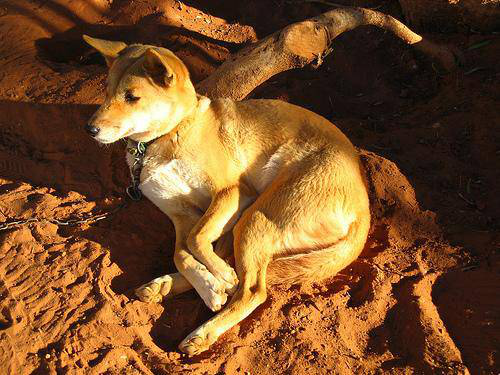

In [36]:
img=PIL.Image.open(fn)
img

In [37]:
img.size

(500, 375)

In [38]:
# Images in Imagenet are trained in (224,224) or (229,229). so it will be helpfull for our image to fit

# Dictionary comphrehension

In [39]:
# Mapping name of the file to size of the file
size_d={k:PIL.Image.open(PATH+k).size for k in data.trn_ds.fnames}

In [40]:
size_d

{'train/001513dfcb2ffafc82cccf4d8bbaba97.jpg': (500, 375),
 'train/001cdf01b096e06d78e9e5112d419397.jpg': (500, 375),
 'train/0021f9ceb3235effd7fcde7f7538ed62.jpg': (500, 500),
 'train/002211c81b498ef88e1b40b9abf84e1d.jpg': (500, 375),
 'train/00290d3e1fdd27226ba27a8ce248ce85.jpg': (500, 470),
 'train/002a283a315af96eaea0e28e7163b21b.jpg': (231, 227),
 'train/0042188c895a2f14ef64a918ed9c7b64.jpg': (500, 332),
 'train/0067dc3eab0b3c3ef0439477624d85d6.jpg': (402, 343),
 'train/006cc3ddb9dc1bd827479569fcdc52dc.jpg': (250, 223),
 'train/00792e341f3c6eb33663e415d0715370.jpg': (200, 192),
 'train/007b5a16db9d9ff9d7ad39982703e429.jpg': (374, 212),
 'train/007b8a07882822475a4ce6581e70b1f8.jpg': (333, 500),
 'train/007ff9a78eba2aebb558afea3a51c469.jpg': (500, 375),
 'train/008ba178d6dfc1a583617470d19c1673.jpg': (390, 320),
 'train/009509be3ca7cce0ff9e37c8b09b1125.jpg': (400, 346),
 'train/00a338a92e4e7bf543340dc849230e75.jpg': (200, 280),
 'train/00a366d4b4a9bbb6c8a63126697b7656.jpg': (500, 375

In [41]:
row_sz,col_sz=list(zip(*size_d.values()))#Key_value pairs , so values are the dimensions
# unzipping rows and columns into respective variables

In [42]:
row_sz=np.array(row_sz)
col_sz=np.array(col_sz)


(array([3023., 5024.,   92.,   15.,    5.,    3.,   13.,    2.,    0.,    1.]),
 array([  97. ,  413.7,  730.4, 1047.1, 1363.8, 1680.5, 1997.2, 2313.9, 2630.6, 2947.3, 3264. ]),
 <a list of 10 Patch objects>)

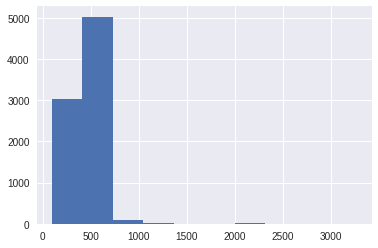

In [43]:
plt.hist(row_sz)

(array([ 135.,  592., 1347., 1164., 4599.,  128.,   76.,   62.,   14.,   11.]),
 array([ 97. , 185.5, 274. , 362.5, 451. , 539.5, 628. , 716.5, 805. , 893.5, 982. ]),
 <a list of 10 Patch objects>)

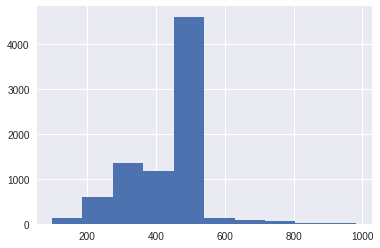

In [44]:
plt.hist(row_sz[row_sz<1000])

In [45]:
len(data.trn_ds),len(data.test_ds)

(8178, 10357)

In [46]:
len(data.classes),data.classes[:5]

(120,
 ['affenpinscher',
  'afghan_hound',
  'african_hunting_dog',
  'airedale',
  'american_staffordshire_terrier'])

# 3- Initial Model

In [47]:
def get_data(sz,bs):
    tfms=tfms_from_model(arch, sz,aug_tfms=transforms_side_on,max_zoom=1.1)
    data=  ImageClassifierData.from_csv(PATH,'train',f'{PATH}labels.csv',test_name='test',num_workers=8,
                                     val_idxs=val_idxs,suffix='.jpg',tfms=tfms,bs=bs)
    return data if sz>300 else data.resize(340,'tmp')

In [48]:
sz=224
bs=64
arch=resnet101

In [49]:
data=get_data(sz,bs)

In [50]:
# The reason for passing size and batcxh_size is when we start working with training on dataset we want everything to go superfast
# So if we use small images i.e 64 it runs superfast , later on we use big images and big architectures and we get 
# Cuda oom . so interupt the kernel and restart and change the batch size to something smaller

In [51]:
learn=ConvLearner.pretrained(arch,data,precompute=True)


Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /content/.torch/models/resnet101-5d3b4d8f.pth
100%|██████████| 178728960/178728960 [00:05<00:00, 29795192.69it/s]


100%|██████████| 162/162 [02:22<00:00,  1.14it/s]


In [61]:
learn.fit(1e-2,5)

epoch      trn_loss   val_loss   accuracy                   
    0      1.228195   0.573197   0.870841  
    1      0.609908   0.440008   0.886986                    
    2      0.453979   0.402988   0.886497                    
    3      0.376687   0.389833   0.889922                    
    4      0.319765   0.352689   0.892368                    



[array([0.35269]), 0.8923679066497519]

In [64]:
learn.precompute=False
learn.fit(1e-2,3,cycle_len=2)

epoch      trn_loss   val_loss   accuracy                    
    0      0.301255   0.339114   0.891879  
    1      0.257961   0.333905   0.892857                    
    2      0.270334   0.33871    0.894325                    
    3      0.240482   0.335309   0.89726                     
    4      0.241256   0.34061    0.890411                    
    5      0.232081   0.339457   0.8909                      



[array([0.33946]), 0.89090019546143]

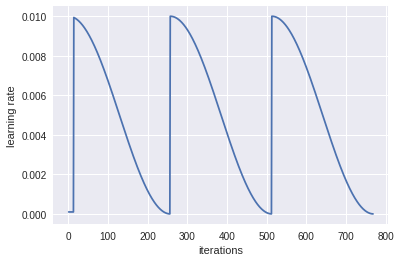

In [65]:
learn.sched.plot_lr()

In [66]:
learn.precompute=False
learn.fit(1e-2,5,cycle_len=1)

epoch      trn_loss   val_loss   accuracy                    
    0      0.230918   0.33746    0.899706  
    1      0.228687   0.338913   0.894325                    
    2      0.223572   0.339671   0.892368                    
    3      0.215603   0.336211   0.89726                     
    4      0.203732   0.338736   0.898728                    



[array([0.33874]), 0.8987279836445639]

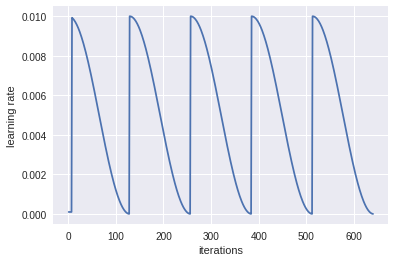

In [67]:
learn.sched.plot_lr()

In [52]:
lr=np.array([1e-4,1e-3,1e-2])

In [53]:
learn.precompute=False
learn.fit(lr,3,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                   
    0      1.551771   0.835872   0.849804  
    1      0.827251   0.456419   0.884051                    
    2      0.601379   0.430741   0.892857                    
    3      0.540254   0.376385   0.898728                    
    4      0.463126   0.358236   0.894814                    
    5      0.395522   0.345926   0.896771                    
    6      0.376274   0.344039   0.899217                    



[array([0.34404]), 0.899217221718245]

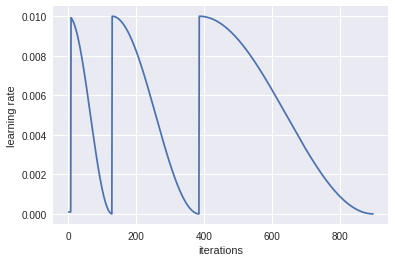

In [54]:
learn.sched.plot_lr()

In [55]:
log_preds,y = learn.TTA()


In [56]:
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs,y)

0.9041095890410958

In [57]:
metrics.log_loss(y, probs)

0.34459581637361536

[[20  0  0 ...  0  0  0]
 [ 0 22  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 13  0  0]
 [ 0  0  0 ...  0 12  0]
 [ 0  0  0 ...  0  0 14]]


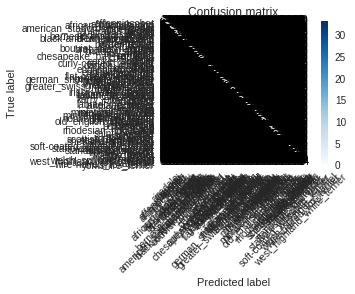

In [58]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)
plot_confusion_matrix(cm, data.classes)

In [59]:
log_preds,y = learn.TTA(is_test=True)
# probs = np.mean(np.exp(log_preds),0)
# accuracy_np(probs,y)


0.006951820025103795

In [ ]:
log_preds=np.argmax(log_preds,axis=1)

In [75]:
import os
log_preds

array([ 3, 39, 47, 47, 47])

In [74]:
pred=[data.classes[i].replace("_"," ") for i in log_preds]
probs=np.exp(log_preds)

In [82]:
pred

['airedale',
 'english foxhound',
 'german short-haired pointer',
 'german short-haired pointer',
 'german short-haired pointer']

In [84]:
# sub=pd.DataFrame({'file':os.listdir(f'{PATH}test'),'species':pred})
# sub.to_csv(f'{PATH}SUB',index=False)
# Cant do prediction on test dataset as labels arent provided

In [66]:
log_preds[:,1]
y[10]

array([0.], dtype=float32)

In [68]:
testprobs = np.exp(log_preds[:,1])
testprobs

(5, 120)

In [69]:
data.test_ds

In [61]:
# metrics.log_loss(y, probs)

In [ ]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)
plot_confusion_matrix(cm, data.classes)

In [83]:
learn

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (2): ReLU(inplace)
  (3): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1), ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True)
      )
    )
    (1): Bot